<a href="https://colab.research.google.com/github/DilshanManathunge/1st-Repo/blob/master/Sequence/timeSeries_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
def plot_series(time,series,format="-",start=0,end=None):
  plt.plot(time[start:end],series[start:end],format)
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.grid(True)

In [12]:
def trend(time,slope = 0 ):
  return slope * time
def seasonal_pattern(seasonal_time):
  return np.where(seasonal_time > 0.4, np.cos(seasonal_time * 2 * np.pi),1/np.exp(3 * seasonal_time))

In [10]:
def seasonality(time,period,amplitude =1,phase = 0):
  season_time = ((time + phase)% period)/period
  return amplitude * seasonal_pattern(season_time) 

In [6]:
def noise(time,noise_level = 1,seed = None):
  rnd = np.random.RandomState(seed)
  return rnd.randn(len(time))*noise_level 

In [7]:
time = np.arange(4 * 365 + 1 ,dtype="float32")
baseline = 10 
series = trend(time,0.1)
baseline = 10 
amplitude = 40
slope  = 0.05 
noise_level = 5



In [13]:
series =baseline + trend(time,slope) + seasonality(time,period=356,amplitude=amplitude)

In [14]:
series += noise(time,noise_level,seed =42)
split_time =1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid  = time[split_time:]
x_valid = series[split_time :]
window_size = 20
batch_size = 32 
shuffle_baffer_size = 1000

In [19]:
def windowded_dataset(series,window_size,batch_size,shuffle_buffer):
  dataset  = tf.data.Dataset.from_tensor_slices(series)
  dataset  = dataset.window(window_size+1 ,shift = 1 ,drop_remainder = True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size +1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window : (window[:-1],window[-1:]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset 

In [20]:
dataset = windowded_dataset(series,window_size,batch_size,shuffle_baffer_size)
print(dataset)
layer0 = tf.keras.layers.Dense(1,input_shape=[window_size])

model = tf.keras.models.Sequential([layer0])
model.compile(loss = "mse",optimizer = tf.keras.optimizers.SGD(lr = 1e-6,momentum=0.9))
model.fit(dataset,epochs = 100,verbose = 1)
print("Layer weights {}".format(layer0.get_weights()))

<PrefetchDataset shapes: ((None, None), (None, None)), types: (tf.float32, tf.float32)>
Epoch 1/100
46/46 [==============================] - 0s 3ms/step - loss: 818.3569
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 80.3175
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 74.2420
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 80.7292
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 70.9189
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 72.7105
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 68.5638
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 66.2505
Epoch 9/100
46/46 [==============================] - 0s 4ms/step - loss: 64.9015
Epoch 10/100
46/46 [==============================] - 0s 3ms/step - loss: 65.5196
Epoch 11/100
46/46 [==============================] - 0s 3ms/step - loss: 64.9482
Epoch 12/100
46/46

NameError: ignored

In [21]:
print("Layer weights {}".format(layer0.get_weights()))

Layer weights [array([[-4.8835184e-02],
       [-2.3004690e-02],
       [ 3.1902879e-02],
       [-2.0237962e-02],
       [ 2.0488555e-02],
       [ 2.8302526e-04],
       [ 1.4017032e-02],
       [-3.9235421e-02],
       [ 2.5059097e-03],
       [-8.5711461e-03],
       [ 1.1008755e-02],
       [ 5.3027246e-02],
       [-6.4388454e-02],
       [ 6.6513546e-02],
       [ 1.8925112e-02],
       [ 4.8889853e-02],
       [ 9.2026159e-02],
       [ 2.2646488e-01],
       [ 2.4083005e-01],
       [ 3.6333072e-01]], dtype=float32), array([0.01744073], dtype=float32)]


NameError: ignored

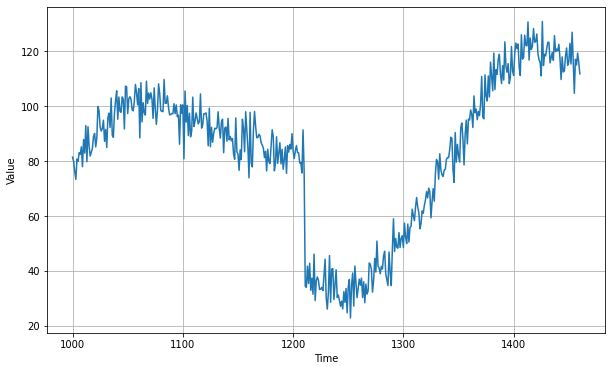

In [23]:
forecast = []
for time in range(len(series)-window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
result = np.array(forecast)[:,0,0]

plt.figure(figsize=(10,6))
plot_series(time_valid,x_valid)
plot_series(time_valid,results)

In [ ]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()